<a href="https://colab.research.google.com/github/viniiciusBsilva/DataScience/blob/main/Regress%C3%A3o_Linear_Atividade1_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistemas Inteligentes
Aluno: Vinícius Barbosa da Silva

Matrícula: 20181SI0007


Professor: Josenildo


Link: https://dados.gov.br/dados/conjuntos-dados/mec-fundo-de-financiamento-estudantil-fies

**Sobre os Dados:**

O Fundo de Financiamento Estudantil (FIES) é destinado à concessão de financiamento a estudantes de cursos superiores não gratuitos e com avaliação positiva nos processos conduzidos pelo Ministério da Educação.

Conjunto de dados: Dados dos processos seletivos do FIES referentes ao primeiro e segundo semestres de 2019.

Descrição: Dados referentes às vagas propostas pelas mantenedoras de instituições de educação superior para participação nos processos seletivos realizados no ano de 2019 e informações sobre os candidatos inscritos na modalidade FIES nos processos seletivos realizados no ano de 2019.

Passo a passo:
1. Escolha um conjunto de dados e guarde a URL do mesmo.
2. Faça uma descrição do dataset (ex: describe, summary do pandas, etc.)
3. Faça uma análise dos atributos (histograma, scatter plots, correlações, etc)
4. Escolha uma váriável para ser o atributo alvo, o y da regressão,  e explique por que você a escolheu.
5. Escolha uma só variável preditora x e explique por que ela foi escolhida.
6. Realize a regressão simples utilizando apenas o x e y escolhidos por você. Discuta qual método de regressão foi escolhido (OLS, algébrico, etc). Também indique qual biblioteca foi utilizada.
7. Adicione outras variável preditoras x1, x2, x3, etc. Agora realize uma regressão multivariável.
8. Análise de resultados utilizando uma métrica de performance (r2, por exemplo). Compare os modelos encontrados nos itens 6 e 7.


### Import e Selecionando colunas para fins de estudo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pprint as pp
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from numpy.random import seed
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/fies_oferta_2019_1_validado.csv', sep=';',encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28157 entries, 0 to 28156
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Ano                                28157 non-null  int64 
 1   Semestre                           28157 non-null  int64 
 2   Nome Mantenedora                   28157 non-null  object
 3   Código e-MEC da Mantenedora        28157 non-null  int64 
 4   CNPJ da mantenedora                28157 non-null  int64 
 5   Nome da IES                        28157 non-null  object
 6   Código e-MEC da IES                28157 non-null  int64 
 7   Organização Acadêmica da IES       28157 non-null  object
 8   UF da IES                          28157 non-null  object
 9   Município da IES                   28157 non-null  object
 10  Nome do Local de oferta            28157 non-null  object
 11  Código do Local de Oferta          28157 non-null  int64 
 12  Muni

In [ ]:
df2 = pd.read_csv('/content/fies_oferta_2019_1_validado.csv', sep=';', usecols=[10,13,21,23,28,38,39,51,52], encoding='latin-1')

In [ ]:
df2.sample(10)

,Nome do Local de oferta,UF do Local de Oferta,Nota de Corte Grupo Preferência,Nome do Curso,Vagas ofertadas FIES,Valor bruto do curso,1 Semestre Bruto,Valor do curso para FIES,1 Semestre FIES
2457,SEDE - UNIVERSIDADE CATÓLICA DO SALVADOR,BA,537.00,COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA,36,48360.00,6510.00,48360.00,6510.00
11139,UNIDADE SEDE,SP,525.44,MEDICINA VETERINÁRIA,80,158310.75,16527.38,138396.83,11992.43
13403,SEDE - VICENTE PIRES,DF,644.06,ENGENHARIA CIVIL,30,89640.68,7872.00,71712.54,6297.60
795,UNIDADE SEDE,BA,599.74,ENGENHARIA CIVIL,18,72464.50,7246.45,64435.40,6443.54
25691,CAMPUS SEDE,MG,582.56,CIÊNCIAS CONTÁBEIS,40,63792.00,7974.00,53706.24,6713.28
17355,ANEXO PRÉDIO ENGENHARIAS E OFICINAS,RS,524.56,ENGENHARIA MECÂNICA,16,112725.30,11272.53,107089.00,10708.90
27876,MADUREIRA,RJ,585.04,PEDAGOGIA,79,44220.40,4627.71,30954.27,3239.40
1436,UNIDADE SEDE,MG,463.58,LETRAS - PORTUGUÊS E ESPANHOL,50,15084.00,2514.00,14040.00,2340.00
10631,Unirb-Alagoinhas,BA,541.70,NUTRIÇÃO,32,65664.00,8208.00,65664.00,8208.00
19624,CAMPUS - CAMPINAS - FAZENDA SANTA CÂNDIDA,SP,599.46,ENGENHARIA DE PRODUÇÃO,40,137982.00,7326.00,131584.20,6593.40


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28157 entries, 0 to 28156
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Nome do Local de oferta            28157 non-null  object
 1   UF do Local de Oferta              28157 non-null  object
 2    Nota de Corte Grupo Preferência   28157 non-null  object
 3   Nome do Curso                      28157 non-null  object
 4   Vagas ofertadas FIES               28157 non-null  int64 
 5    Valor bruto do curso              28157 non-null  object
 6    1 Semestre Bruto                  28157 non-null  object
 7    Valor do curso para FIES          28157 non-null  object
 8    1 Semestre FIES                   28157 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB


### Função para converter as colunas do tipo object para float64

In [ ]:
def converter_coluna_float(df, column_names):
  for column_name in column_names:
    if column_name not in df.columns:
      raise ValueError(f"A coluna '{column_name}' não existe no DataFrame.")
    df[column_name] = df[column_name].str.replace('.', '').str.replace(',', '.')
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

  return df

In [ ]:
lista_colunas = [' Nota de Corte Grupo Preferência ', ' Valor bruto do curso ', ' 1 Semestre Bruto ', ' Valor do curso para FIES ', ' 1 Semestre FIES ']
df = converter_coluna_float(df2, lista_colunas)

<ipython-input-8-75d9bbd40d29>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].str.replace('.', '').str.replace(',', '.')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28157 entries, 0 to 28156
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nome do Local de oferta            28157 non-null  object 
 1   UF do Local de Oferta              28157 non-null  object 
 2    Nota de Corte Grupo Preferência   27884 non-null  float64
 3   Nome do Curso                      28157 non-null  object 
 4   Vagas ofertadas FIES               28157 non-null  int64  
 5    Valor bruto do curso              28157 non-null  float64
 6    1 Semestre Bruto                  28157 non-null  float64
 7    Valor do curso para FIES          28157 non-null  float64
 8    1 Semestre FIES                   28157 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.9+ MB


### Describe e pairplot das colunas numéricas para observar possível regressão

In [ ]:
df2.describe()

,Nota de Corte Grupo Preferência,Vagas ofertadas FIES,Valor bruto do curso,1 Semestre Bruto,Valor do curso para FIES,1 Semestre FIES
count,27884.000000,28157.000000,2.815700e+04,28157.000000,28157.000000,28157.000000
mean,556.092788,31.020563,5.996446e+04,6619.239408,52480.331820,5597.429233
std,50.338804,26.530958,5.069877e+04,4236.959343,46899.051691,3931.902464
min,450.000000,1.000000,2.666640e+03,459.630000,2666.640000,459.630000
25%,528.960000,15.000000,3.064490e+04,4303.600000,25842.800000,3491.860000
50%,563.740000,25.000000,5.361000e+04,5994.000000,45422.730000,4920.000000
75%,588.280000,40.000000,7.774600e+04,7848.000000,68138.370000,6593.400000
max,811.520000,700.000000,1.006858e+06,82865.000000,884815.000000,62962.660000


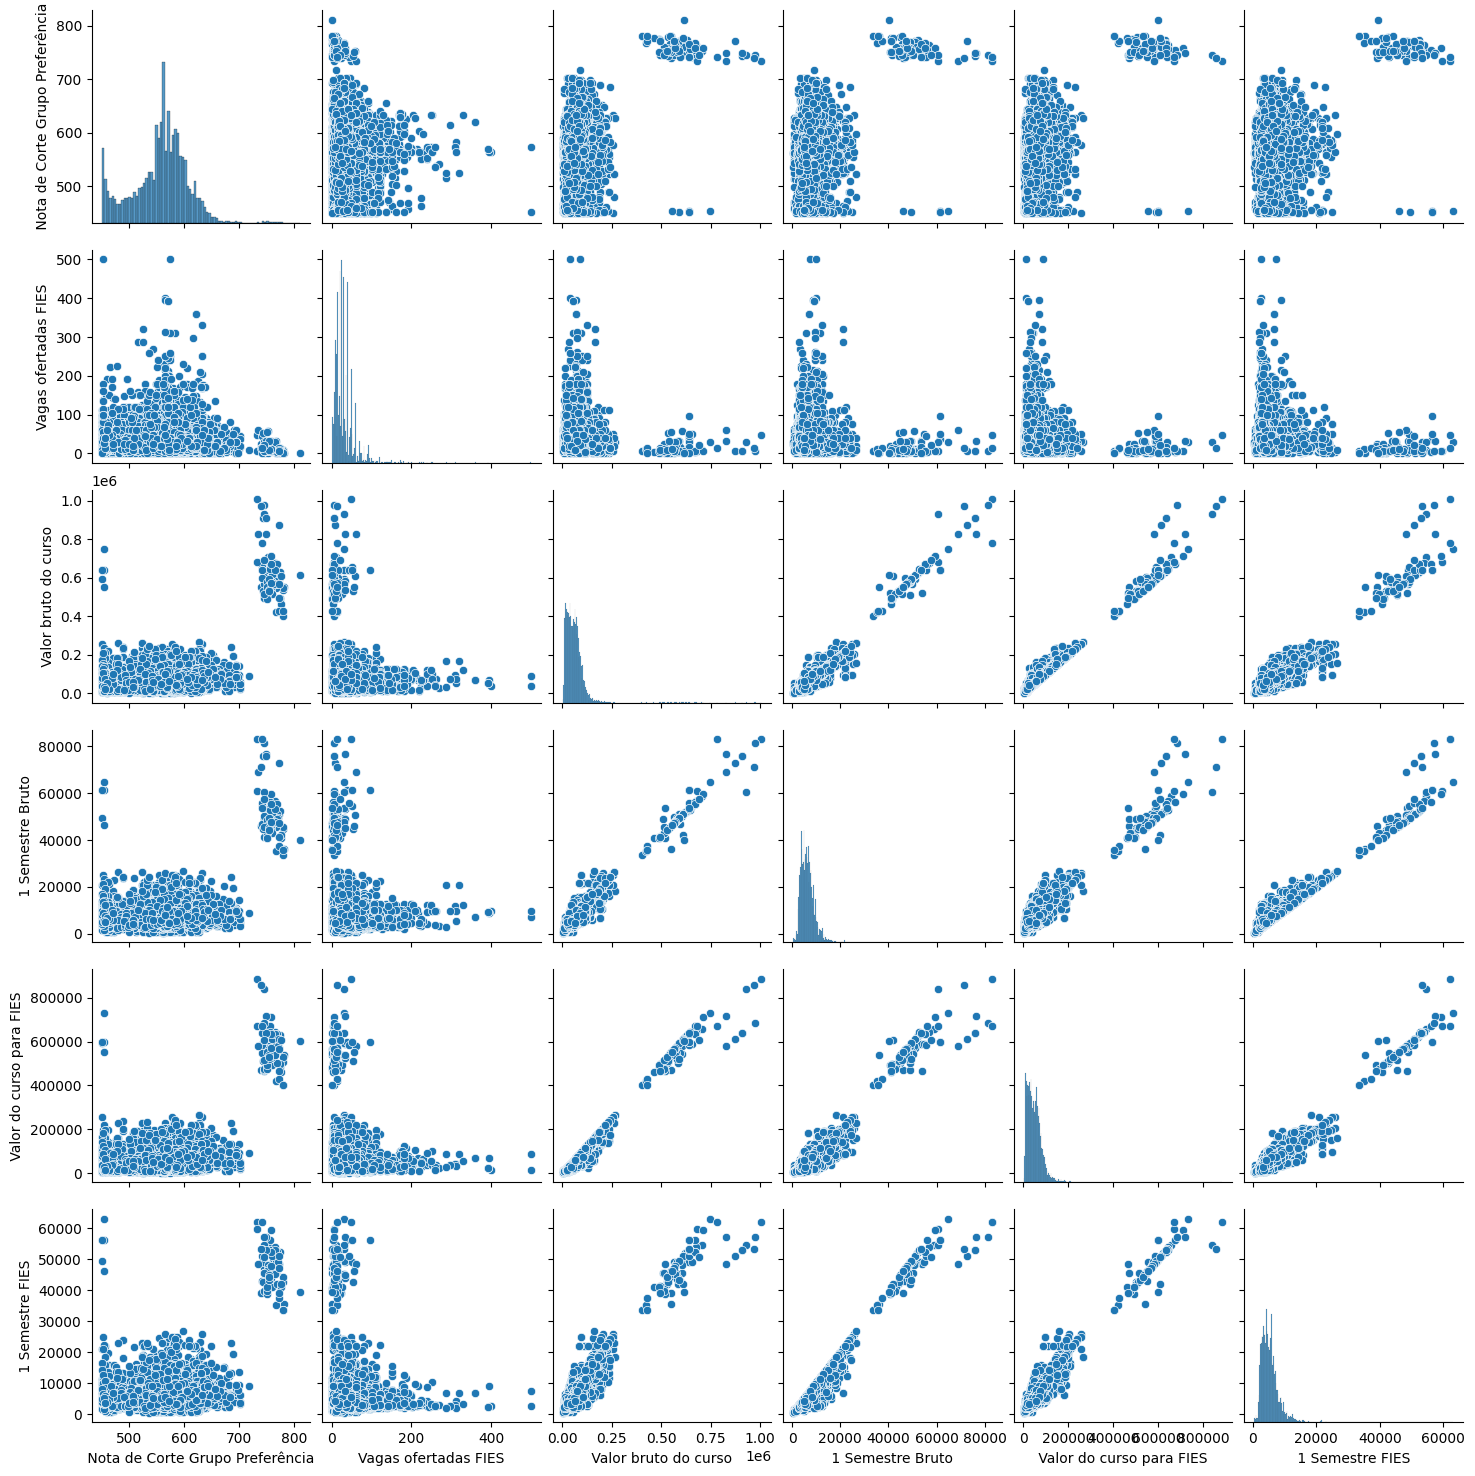

In [ ]:
sns.pairplot(df2)

### Escolha das colunas X=1 Semestre Bruto e y=1 Semestre FIES para Regressão Linear

Text(0.5, 1.0, 'Valor em Real da mensaliade do primeiro semestre')

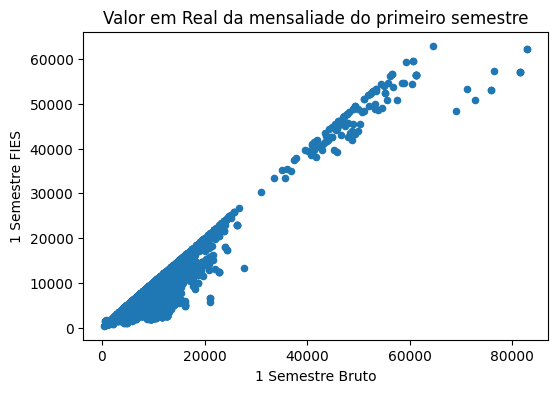

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df2[' 1 Semestre Bruto '],df2[' 1 Semestre FIES '],s=20)
plt.xlabel('1 Semestre Bruto')
plt.ylabel('1 Semestre FIES')
plt.title("Valor em Real da mensaliade do primeiro semestre")

In [ ]:
df_regression = df2.copy()

In [ ]:
df_regression.rename(columns={' 1 Semestre Bruto ': 'Valor_Bruto', ' 1 Semestre FIES ': 'Valor_FIES'}, inplace=True)

In [ ]:
lr = LinearRegression()

como observado na linha de código a baixo, a coluna Valor_FIES foi escolhida como y pois queremos saber os valores do 1° semestre do FIES dado que temos os valores do X = Valor_bruto, 1° semestre Bruto(mais fácil de se obter na instituição de ensino)

In [ ]:
lr.fit(X=df_regression[['Valor_Bruto']].values,y=df_regression['Valor_FIES'].values)

LinearRegression()

In [ ]:
print('b1 %.5f' % lr.coef_)
print('b0 = %.5f'% lr.intercept_)
print('Modelo: andares =  %.5f*valor_bruto + %.5f' % (lr.coef_,lr.intercept_))

b1 0.87323
b0 = -182.66977
Modelo: andares =  0.87323*valor_bruto + -182.66977


Score e R2

In [ ]:
score= lr.score(X=df_regression[['Valor_Bruto']].values,y=df_regression['Valor_FIES'].values)
r2 = r2_score(y_true=df_regression['Valor_FIES'],y_pred=lr.predict(df_regression[['Valor_Bruto']].values))
print('Score = %.5f' % score)
print('R2 = %.5f' % r2)

Score = 0.88544
R2 = 0.88544


Exemplo para teste

In [ ]:
Valor_Bruto=3500.00
yhat = lr.predict([[Valor_Bruto]])
print('valor do 1° semestre FIES preditos = %.2f' %yhat )

valor do 1° semestre FIES preditos = 2873.62


### Escolha das colunas X=Valor bruto do curso e y=Valor do curso para FIES para Regressão Linear

Text(0.5, 1.0, 'Valor em Real do curso')

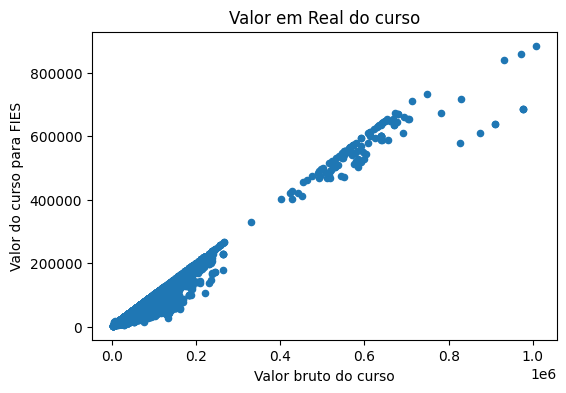

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df2[' Valor bruto do curso '],df2[' Valor do curso para FIES '],s=20)
plt.xlabel('Valor bruto do curso')
plt.ylabel('Valor do curso para FIES')
plt.title("Valor em Real do curso")

In [ ]:
df_curso_regression = df2.copy()

In [ ]:
df_curso_regression.rename(columns={' Valor bruto do curso ': 'Valor_Curso', ' Valor do curso para FIES ': 'Valor_FIES'}, inplace=True)

In [ ]:
lr2 = LinearRegression()

como observado na linha de código a baixo, a coluna Valor_FIES foi escolhida como y pois queremos saber os valores do FIES dado que temos os valores do X = Valor_Curso, Valor total Bruto do curso(mais fácil de se obter na instituição de ensino)

In [ ]:
lr2.fit(X=df_curso_regression[['Valor_Curso']].values,y=df_curso_regression['Valor_FIES'].values)

LinearRegression()

In [ ]:
print('b1 %.5f' % lr2.coef_)
print('b0 = %.5f'% lr2.intercept_)
print('Modelo: andares =  %.5f*valor_Curso + %.5f' % (lr2.coef_,lr.intercept_))

b1 0.90228
b0 = -1624.38298
Modelo: andares =  0.90228*valor_Curso + -182.66977


Score e R2

In [ ]:
score= lr.score(X=df_curso_regression[['Valor_Curso']].values,y=df_curso_regression['Valor_FIES'].values)
r2 = r2_score(y_true=df_curso_regression['Valor_FIES'],y_pred=lr.predict(df_curso_regression[['Valor_Curso']].values))
print('Score = %.5f' % score)
print('R2 = %.5f' % r2)

Score = 0.95034
R2 = 0.95034


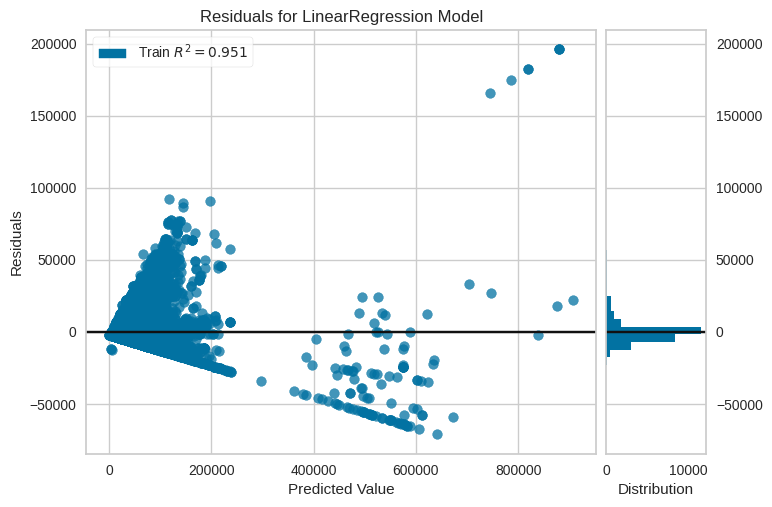

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(lr2)
visualizador.fit(X=df_curso_regression[['Valor_Curso']].values,y=df_curso_regression['Valor_FIES'].values)
visualizador.poof()

Exemplo para teste

In [ ]:
Valor_Bruto=55000.00
yhat = lr.predict([[Valor_Bruto]])
print('valor do Curso pelo FIES preditos = %.2f' %yhat )

valor do Curso pelo FIES preditos = 47844.82


### Regresão multivariada

Escolhido a coluna Valor do curso para FIES como y

In [ ]:
df_mult = df2.copy()
coluns_drop = ['Nome do Local de oferta', 'UF do Local de Oferta', 'Nome do Curso']
df_mult.drop(columns=coluns_drop, inplace = True)
df_mult.sample(3)

,Nota de Corte Grupo Preferência,Vagas ofertadas FIES,Valor bruto do curso,1 Semestre Bruto,Valor do curso para FIES,1 Semestre FIES
17390,581.10,39,27816.07,5484.86,19471.25,3839.4
13716,550.00,10,45773.28,6638.40,45773.28,6638.4
2930,539.62,15,63882.00,4824.00,59434.80,4341.6


Drop dos dados faltantes

In [ ]:
df_mult2 = df_mult.dropna()

In [ ]:
y_mult = df_mult2[' Valor do curso para FIES ']
X_mult = df_mult2.drop([' Valor do curso para FIES '], axis=1)

Split de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size=0.30,random_state=42)

In [ ]:
lr_mult = LinearRegression()

Treinamento com Regressão Linear

In [ ]:
lr_mult.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_mult.coef_

array([ 1.57722952, 21.44606206,  0.89196775, -6.17381826,  7.15073979])

In [ ]:
lr_mult.intercept_

-1689.2433010635868

Score e R²

In [ ]:
score= lr_mult.score(X_test,y_test)
r2_score= r2_score(y_test,lr_mult.predict(X_test))
print('Score = %.5f' % score)
print('R2 = %.5f' % r2_score)

Score = 0.99148
R2 = 0.99148


In [ ]:
r2_score(y_test,lr_mult.predict(X_test))
print('R2 = %.5f' % r2)

0.9914830329577452

Gráfico entre Valores verdadeiros e preditos

In [ ]:
y_pred=lr_mult.predict(X_test)

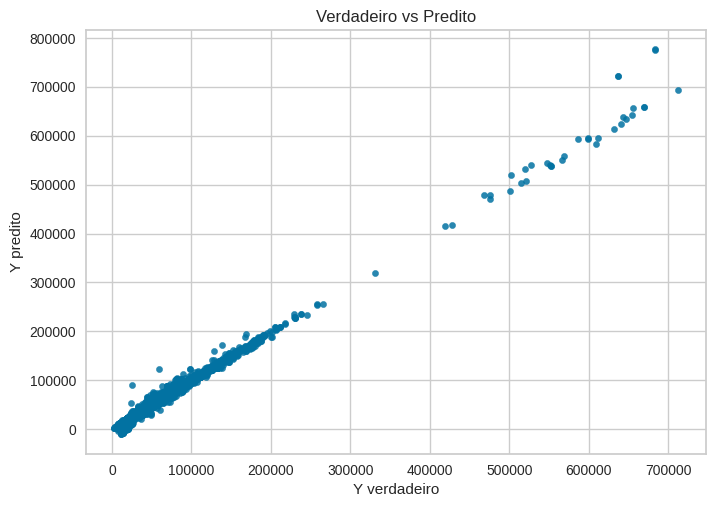

In [ ]:
plt.xlabel('Y verdadeiro')
plt.ylabel('Y predito')
plt.title("Verdadeiro vs Predito")
plt.scatter(y_test,y_pred,alpha=0.85,s=20)

### Análise entre A  Regressão Linear simples x Multivariada

os seguintes valores de score e R² foram encontrados para o treinamento de lr simples na coluna valor do curso para FIES:

Score = 0.95034


R2 = 0.95034


Já para Multivariada obtivemos:

Score = 0.99148

R2 = 0.99148

Ou seja, obtvemos uma melhora de 0,04114 aproximadamente 4% a mais nas métricas de avaliação, o que nos dá uma confiança a mais nas predições da regressão Multivariada para estes treinos e testes. Claro que para uma análise mais confiável, a utilização de validação cruzada nos daria mais confiânça nas predições e nas métricas das regressões apresentadas.